In [22]:
import astropy.units as u
from astropy.visualization import ImageNormalize
from astropy.coordinates import SkyCoord
from sunpy.map import Map
from sunpy.map import make_fitswcs_header
from sunpy.map.header_helper import make_heliographic_header
from sunpy.coordinates import frames

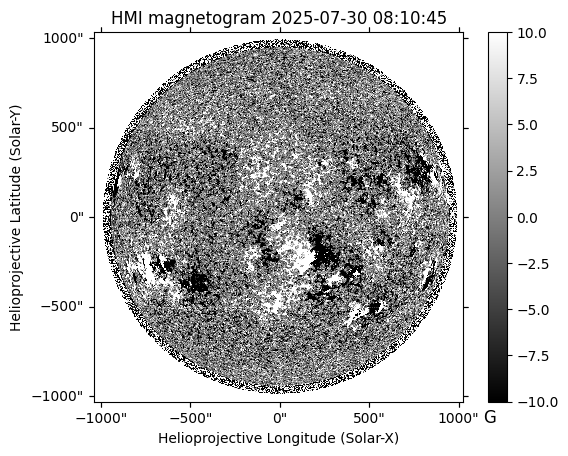

In [16]:
hmi_map = Map('./hmi_data/hmi.m_720s.20250730_081200_TAI.3.magnetogram.fits').rotate()
hmi_map.peek(norm=ImageNormalize(vmin=-10, vmax=10))

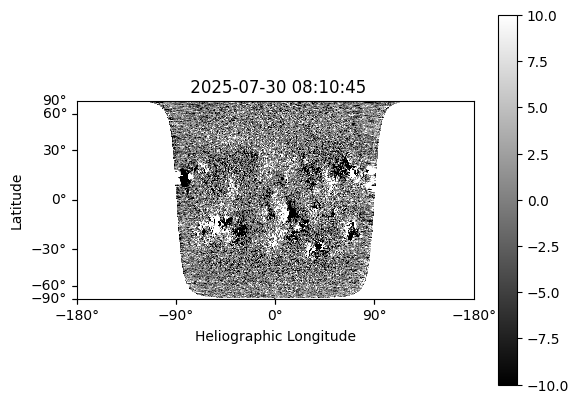

In [17]:
hg_header = make_heliographic_header(
    hmi_map.date,
    hmi_map.observer_coordinate,
    (720, 1440),
    frame='stonyhurst',
    projection_code='CEA',
    map_center_longitude=0*u.deg
)
outmap = hmi_map.reproject_to(hg_header)
outmap.peek(norm=ImageNormalize(vmin=-10, vmax=10))

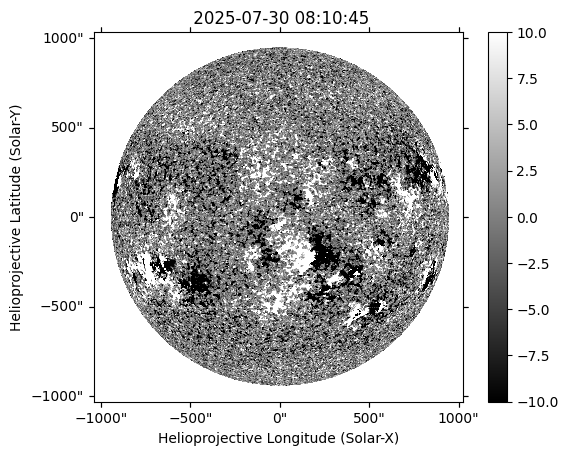

In [18]:
outmap_re = outmap.reproject_to(hmi_map.wcs)
outmap_re.peek(norm=ImageNormalize(vmin=-10, vmax=10))

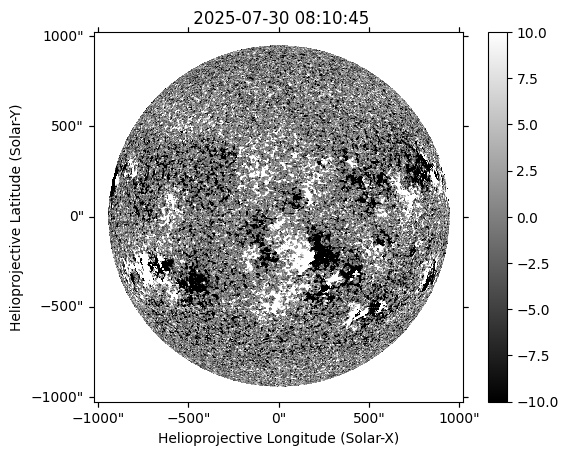

In [23]:
hp_header = make_fitswcs_header(
    (2048, 2048),
    SkyCoord(
        0*u.arcsec,
        0*u.arcsec,
        frame=frames.Helioprojective,
        obstime=outmap.date,
        observer="earth"
    )
)
outmap_hp = outmap.reproject_to(hp_header)
outmap_hp.peek(norm=ImageNormalize(vmin=-10, vmax=10))

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,crln_obs,dsun_obs
 [sunpy.map.mapbase]


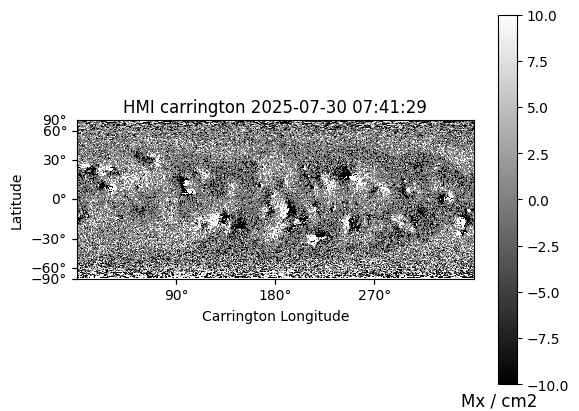

In [25]:
hmi_s = Map('./hmi_data/hmi.synoptic_mr_720s.2300.synopMr.fits')
hmi_s.peek(cmap='gray', norm=ImageNormalize(vmin=-10, vmax=10))

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


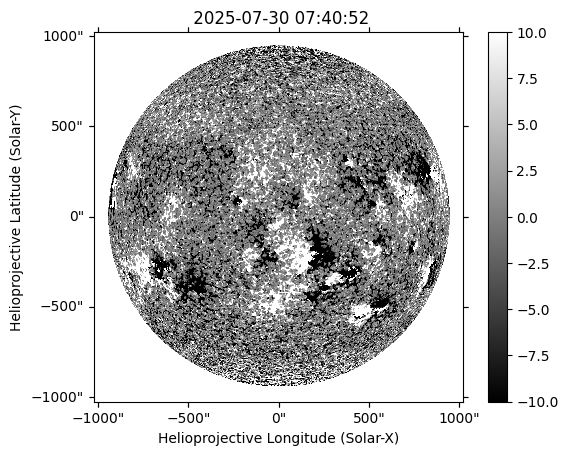

In [27]:
hp_header = make_fitswcs_header(
    (2048, 2048),
    SkyCoord(
        0*u.arcsec,
        0*u.arcsec,
        frame=frames.Helioprojective,
        obstime=hmi_s.date,
        observer="earth"
    )
)
hmi_s_hp = hmi_s.reproject_to(hp_header)
hmi_s_hp.peek(cmap='gray', norm=ImageNormalize(vmin=-10, vmax=10))

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


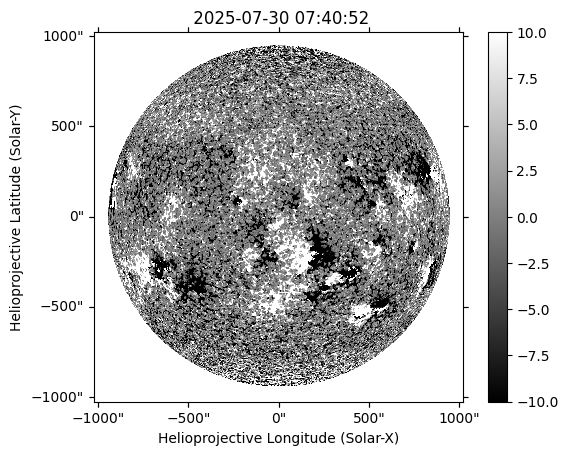

In [37]:
hp_header = make_fitswcs_header(
    (2048, 2048),
    SkyCoord(
        0*u.arcsec,
        0*u.arcsec,
        frame=frames.Helioprojective,
        obstime=hmi_s.date,
        observer="earth"
    )
)
hmi_s_hp = hmi_s.reproject_to(hp_header)
hmi_s_hp.peek(cmap='gray', norm=ImageNormalize(vmin=-10, vmax=10))